# Sales Analysis Project using Python

#### first of all, we have to import all the required libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Now,proceed to import the data from Sales_DataSet.csv

In [56]:
data=pd.read_csv("Sales_DataSet.csv",encoding="unicode_escape")

Showing top 5 rows of dataset

In [57]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


let's see the shape of dataset

In [58]:
data.shape

(11251, 15)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


We can clearly see that , two columns are there with 0 values,so we have to drop those columns

In [60]:
data.drop(['Status','unnamed1'],axis=1,inplace=True)

So,column status and unnamed 1 has been removed successfully,now we will check again to cnfirm

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


let's check null values in dataset

In [62]:
data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

we have 12 null values in amount column,so we have to fix those null values using dropna

In [63]:
data.dropna(inplace=True)

In [64]:
data.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

So,null values have been removed

In [65]:
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


##### We can see all the statistical parameters for numerical columns. Like we can see the maximum and the minimum sale of orders or amiunts

## Exploratory Data Analysis

#### Now , we will perform EDA for some columns

In [66]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

let's start with Gender column

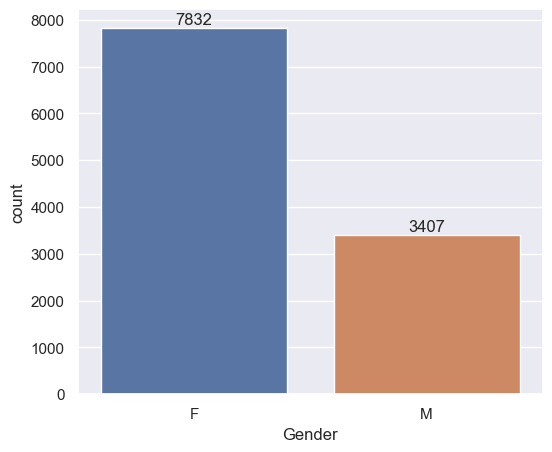

In [67]:
visual=sns.countplot(x='Gender',data=data)
for i in visual.containers:
    visual.bar_label(i)

### Here,we can clearly see that females  purchased more than male 

#### Let's see that how much amount has been spent by the females and male , so that we can decide whom has more purchasing power.

<Axes: xlabel='Gender', ylabel='Amount'>

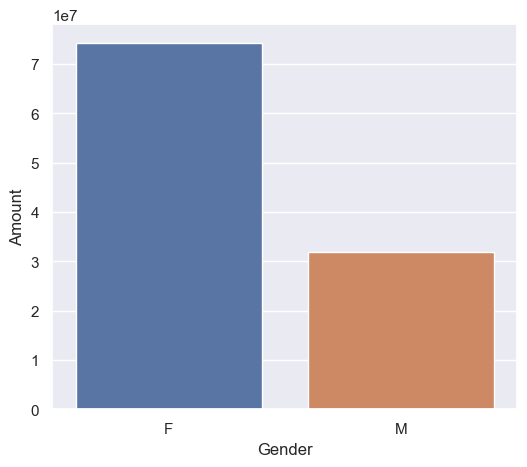

In [68]:
gen_amount=data.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x='Gender',y='Amount',data=gen_amount)

#### By observing previous graphs,we can clearly say that females have spent more money than males.

### Now we will perform EDA on Age column

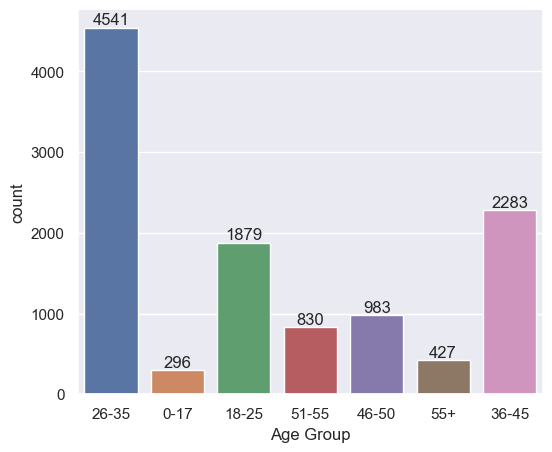

In [69]:
visual=sns.countplot(data=data,x='Age Group')
for i in visual.containers:
    visual.bar_label(i)

#### let's see how many females and males belong to above age group

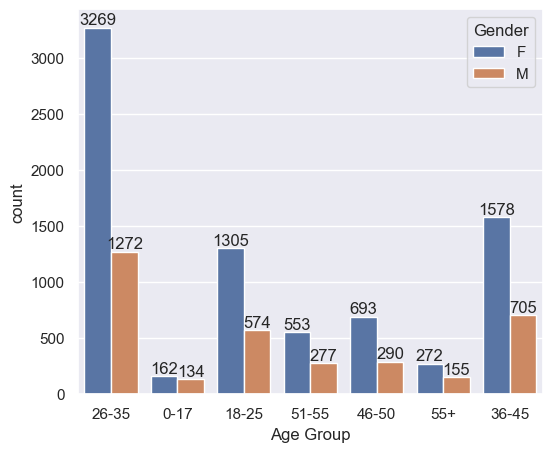

In [70]:
visual=sns.countplot(data=data,x='Age Group',hue='Gender')
for i in visual.containers:
    visual.bar_label(i)

We can clearly see that females has purchased more than males at each and every age-group

### Now we will perform EDA on amount column

#### Now we perform how many age group lies according to amount

<Axes: xlabel='Age Group', ylabel='Amount'>

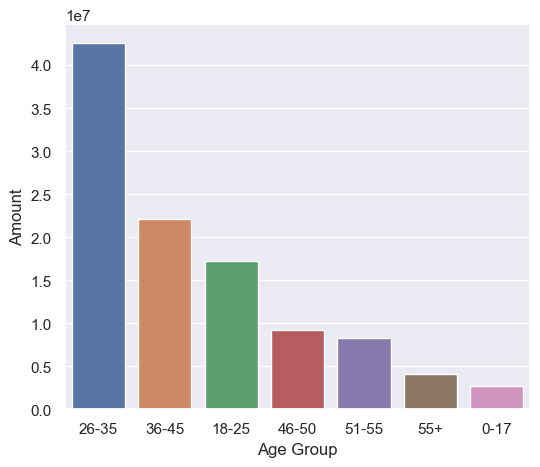

In [71]:
gen_purchase=data.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x='Age Group',y='Amount',data=gen_purchase)

### WE can clearly see that age group 26-45 which is of females age group are spending the most

### Now we will perform EDA on state column

we want  to see that how many orders came from which state and more

<Axes: xlabel='State', ylabel='Orders'>

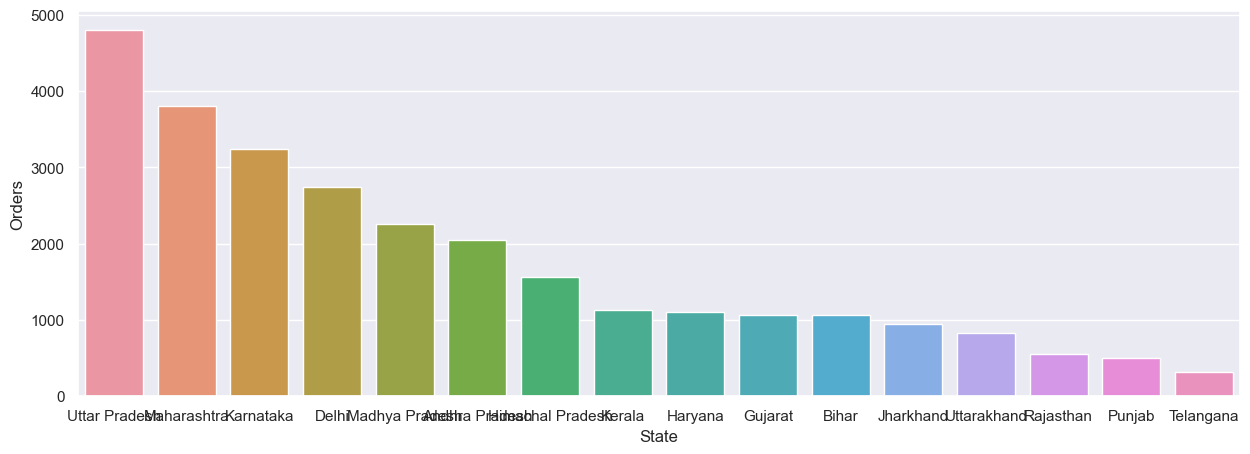

In [72]:
state_orders=data.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by="Orders",ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=state_orders,x='State',y='Orders')

#### Here we have used sns.set for clear visibilty.We are visualizing the data of all states.But all of them UttarPradsesh has more ordering power.

<Axes: xlabel='State', ylabel='Orders'>

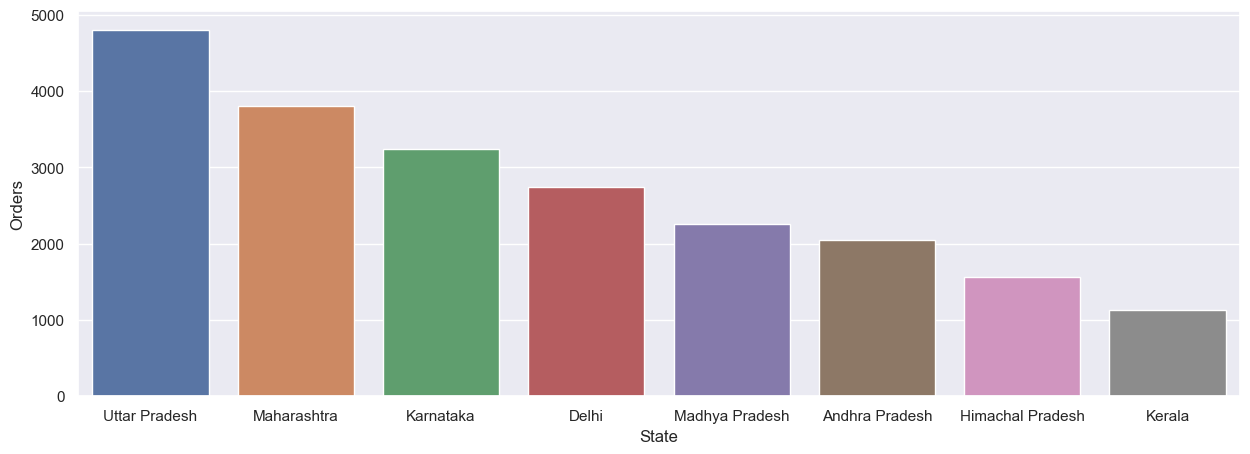

In [73]:
state_orders=data.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by="Orders",ascending=False).head(8)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=state_orders,x='State',y='Orders')

we want  to see that how many amount came from which state and more

<Axes: xlabel='State', ylabel='Amount'>

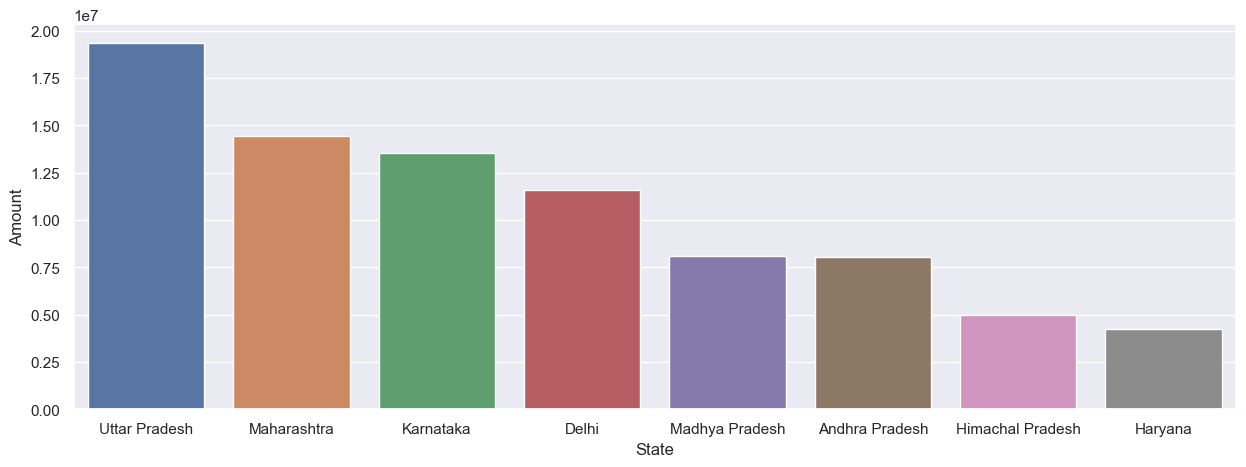

In [74]:
state_amount=data.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by="Amount",ascending=False).head(8)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=state_amount,x='State',y='Amount')

#### We can say that UttarPradsesh has more capacity of amount.

### Now we will perform EDA on Marital Status column

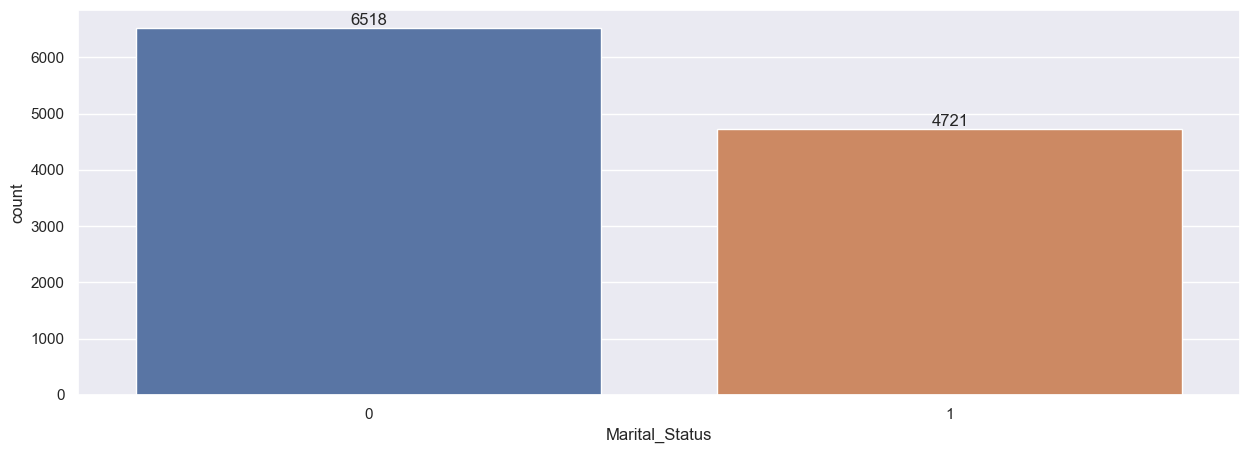

In [75]:
visual=sns.countplot(data=data,x='Marital_Status')
for i in visual.containers:
    visual.bar_label(i)

### We can see that married have more shopping.

<Axes: xlabel='Marital_Status', ylabel='Amount'>

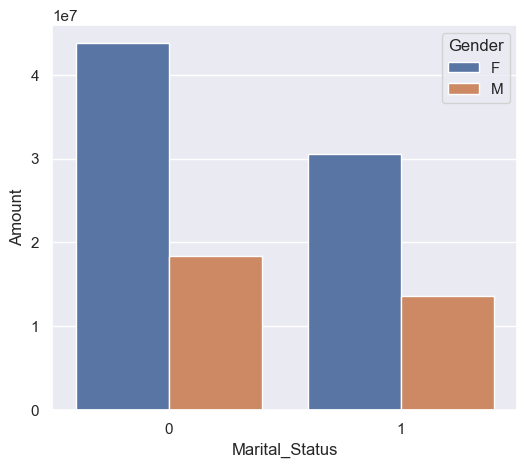

In [87]:
sales_state = data.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

### In married also,females spent more

### Now we will perform EDA on Occupation Status column

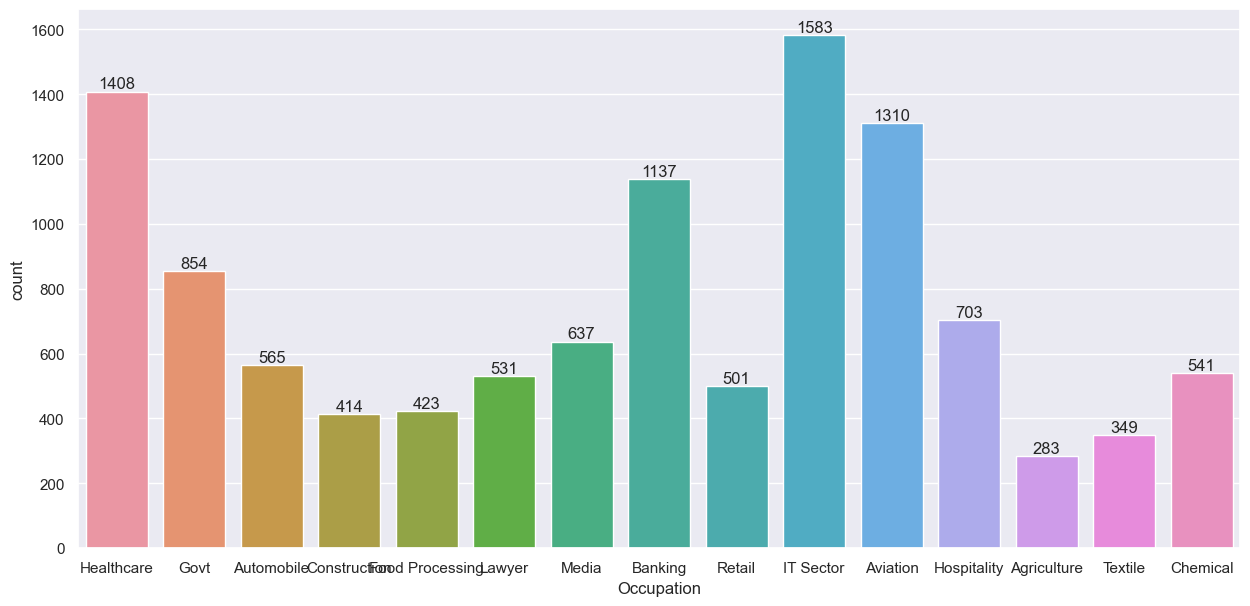

In [86]:
visual=sns.countplot(data=data,x='Occupation')
sns.set(rc={'figure.figsize':(15,7)})
for i in visual.containers:
    visual.bar_label(i)

### Here,we can see that Highest Occupation is from IT Sector in purchasing

<Axes: xlabel='Occupation', ylabel='Amount'>

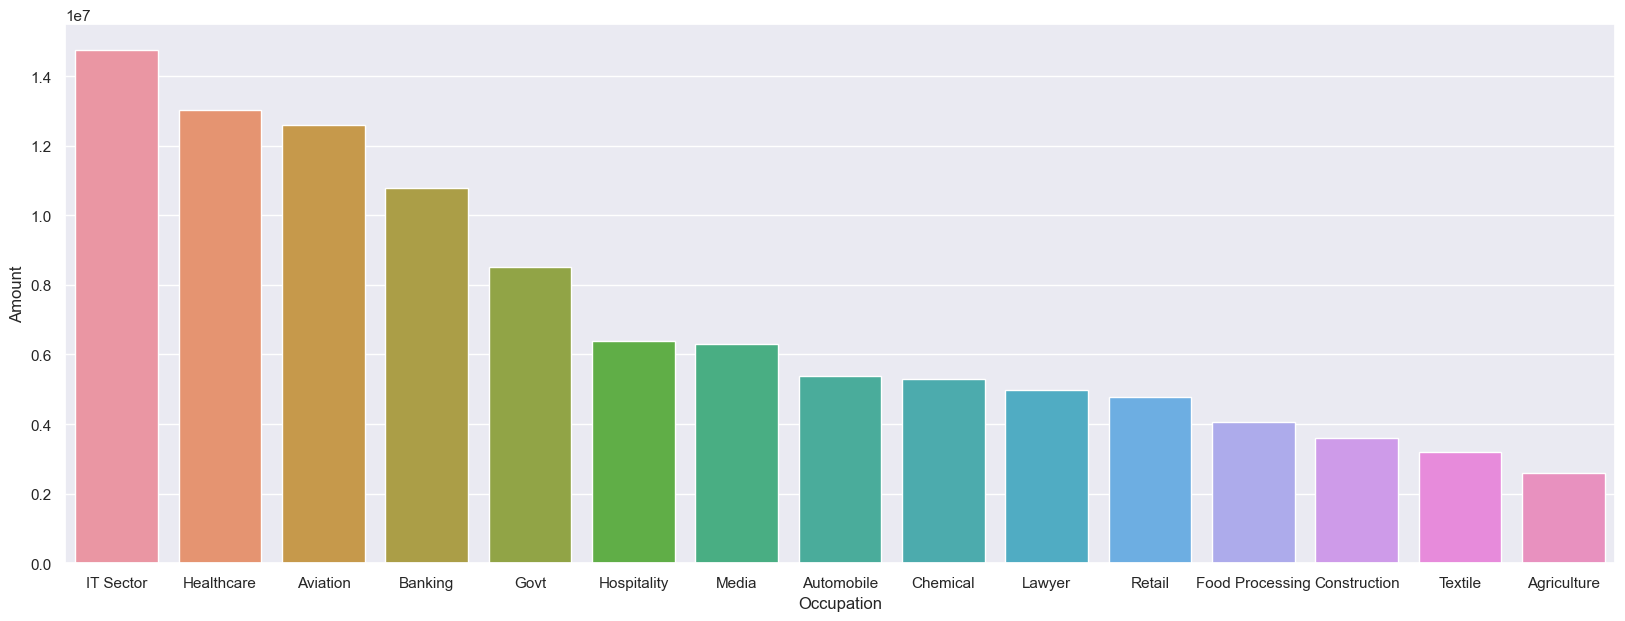

In [89]:
sales_occ = data.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(data = sales_occ, x = 'Occupation',y= 'Amount')

### We can see here IT Sector has More purchasing   as compared to others

### Now we will perform EDA on Product Category Status column

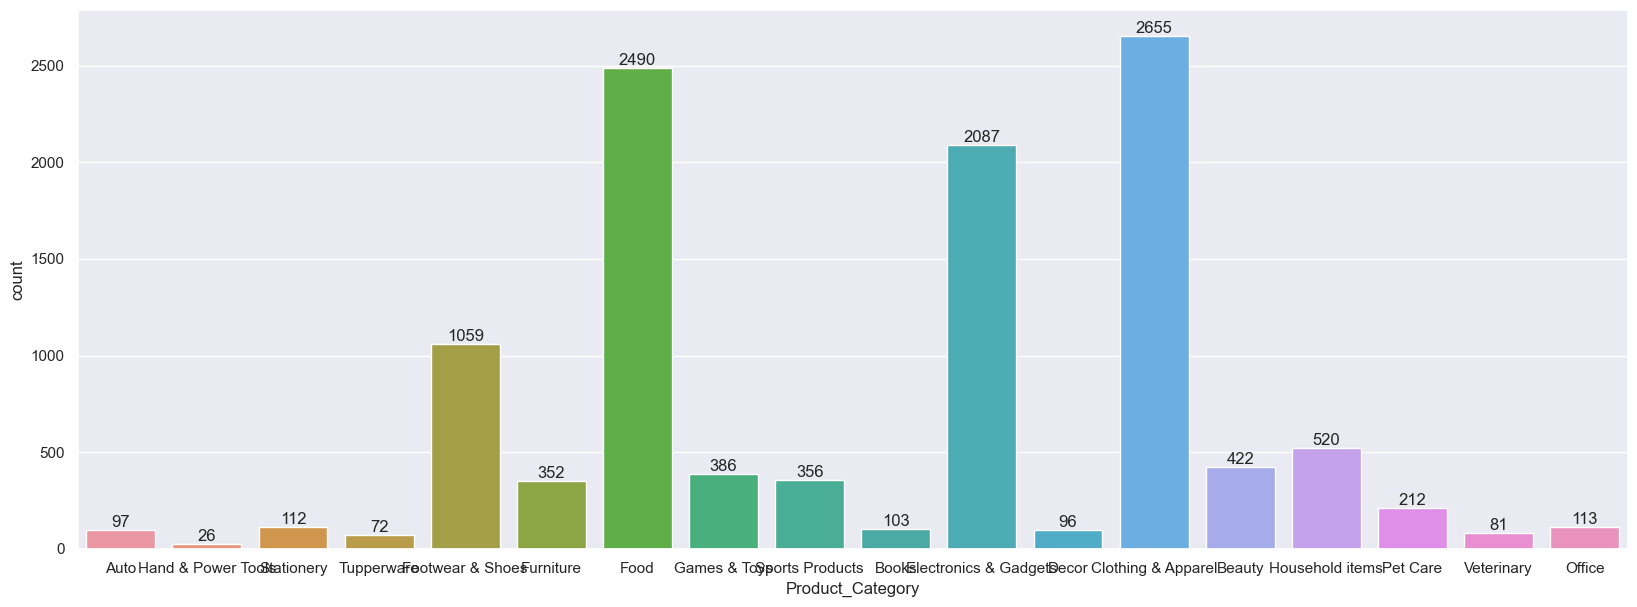

In [91]:
visual=sns.countplot(data=data,x='Product_Category')
sns.set(rc={'figure.figsize':(15,7)})
for i in visual.containers:
    visual.bar_label(i)

### We can clearly see here,that people are spending more on clothes,thenfood and then electonics

<Axes: xlabel='Product_Category', ylabel='Amount'>

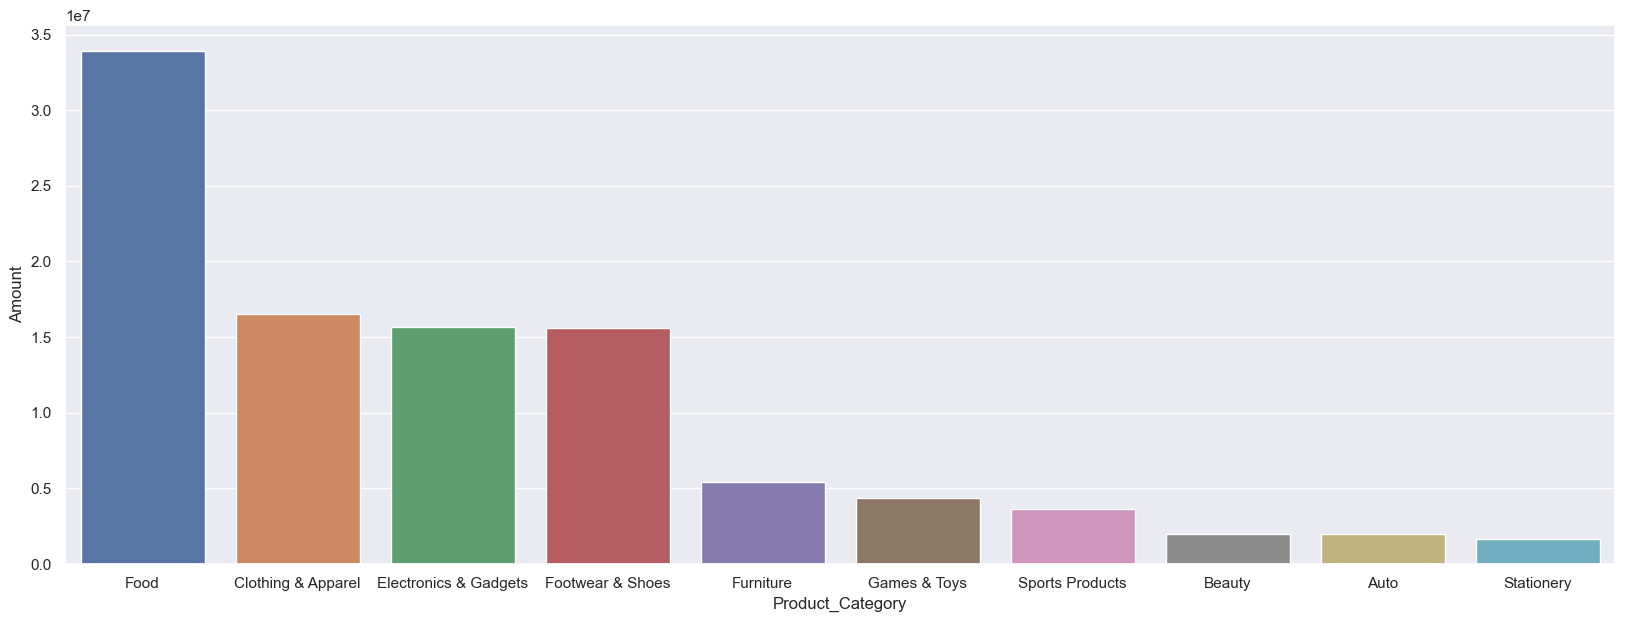

In [97]:
sales_occ = data.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(data = sales_occ, x = 'Product_Category',y= 'Amount')

Here,we can clearly see the difference that food expense is highest,then clothing then electronics

### Now ,let's see top-selling product using product id

<Axes: xlabel='Product_ID', ylabel='Orders'>

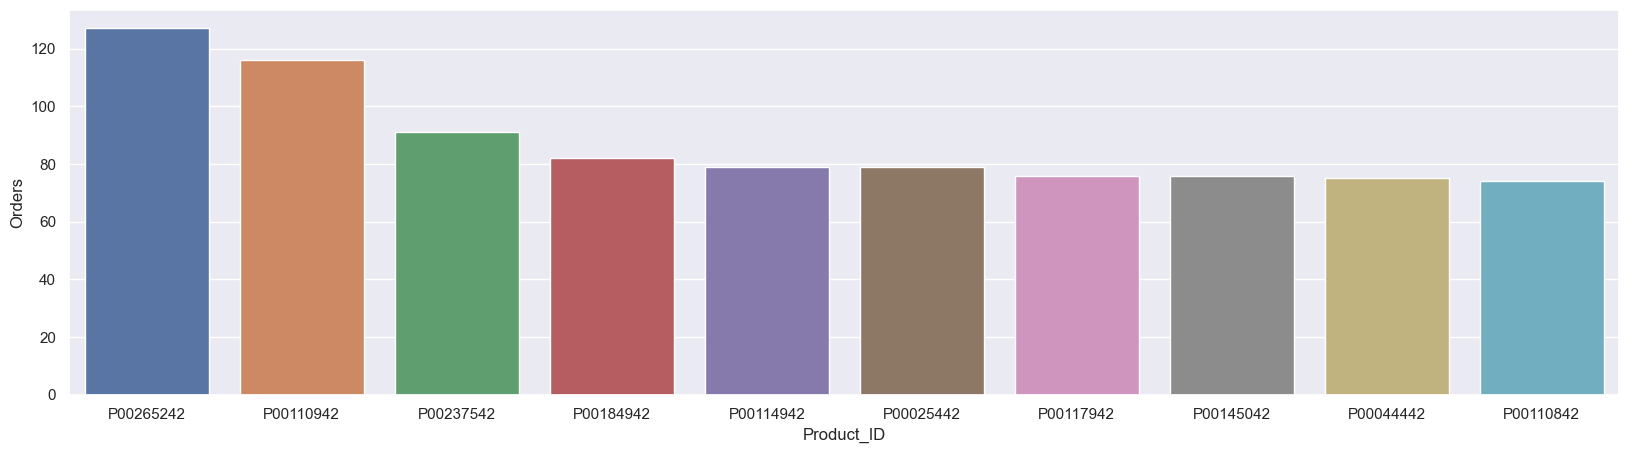

In [100]:
sales_state = data.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

# Final Sales Analysis

#### Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category